# Computer infrastructure: Assessment

Assessment project for the course "Computer Infrastruture" of the Higher Diploma of Science in Computing for Data Analytics, ATU Galway-Mayo, 2025/2026. 

## Module import

The packages required to run the code are imported in the notebook. These include:
- Yfinance: to pull data from Yahoo Finance
- Pandas and Numpy: to manipulate data 
- Os and Datetime: to save files and access directories 
- Re: regular expressions [REMOVE]
- Matplotlib: to plot the data 

In [112]:
# import libraries 
import yfinance as yf
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt
import numpy as np
import re 

## Problem 1: Data from yfinance

**About yfinance** 

Yfinance is a python library that pulls data from the Yahoo Finance API and makes it availale and ready-to-use within python code. The package is not officially linked to the Yahoo Finance organization, but the is updated with regular commits. 

The package can be installed from here: https://pypi.org/project/yfinance/. Documentation can be found here: https://ranaroussi.github.io/yfinance/index.html

### Get_data()

The function get_data() is created to pull hourly data from the past five days for the FAANG stocks (Facebook/Meta, Apple, Amazon, Netflix, Google). 


In [113]:
# create variable for the FAANG stocks: META, AAPL, AMZN, NFLX, GOOG. 
tickers = yf.Tickers('META AAPL AMZN NFLX GOOG')

# show ticker object
tickers

yfinance.Tickers object <META,AAPL,AMZN,NFLX,GOOG>

In [114]:
# create function to get hourly data from the past 5 days for the FAANG stocks. 
def get_data(tickers): 
    # yfinance.download: https://ranaroussi.github.io/yfinance/reference/api/yfinance.download.html#yfinance.download 
    df_with_intervals = tickers.download(period='5d', interval='60m')

    # Verify if a data folder exists, and if not, create one. 
    # See: https://stackoverflow.com/questions/273192/how-do-i-create-a-directory-and-any-missing-parent-directories 
    if not os.path.exists('data'):
        os.makedirs('data')
    
    # save dataframe to csv
    # set path to folder 
    folder_path = 'data/'
    # set file name with time and date. See: https://www.w3schools.com/python/python_datetime.asp
    file_name = datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + '.csv'

    full_path = folder_path + file_name

    # save dataframe to csv: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.htm
    df_with_intervals.to_csv(full_path)

In [115]:
# execute the function 
get_data(tickers)

[                       0%                       ]

[*********************100%***********************]  5 of 5 completed


**About yfinance.download()**

The download method allows to dowload market information for a or multiple ticker objects (the variable *tickers*, in this case). Among the possible arguments, the method allows to select specific periods of time and interval. The output is a table, which is data represented in a tabular format. 

In this case, the variable **df_with_intervals** is a table where each row corresponds to one-hour intervals in the past 5 (working) days. Hourly intervals are pulled only during the opening hours of the stock market (13:30-19:30). Each column displays, for every stock, the following data: 

- Close
- Dividends 
- High
- Low
- Open
- Stock Splits
- Volume 

## Problem 2: Plotting the data



In this section, the most recent data saved is plotted. 

The package os is used to find the most recent file in the data folder, based on the timestamp in the name. 


In [116]:
# List all files in the data folder (see: https://www.geeksforgeeks.org/python/python-os-listdir-method/)
tickers_data = os.listdir('data')
# select the most recent file (see: https://stackoverflow.com/questions/39327032/how-to-get-the-latest-file-in-a-folder)
latest_tickers_data = max(tickers_data)

The most recent data downloaded from Yahoo Finance and saved to a .csv file is opened as a Pandas dataframe. Pandas allows to read different types of strucutred data (including tabular data and json data), manipulate and plot it. 

In [117]:
# import the data from csv to pandas dataframe 
# the first 3 rows are read as headers: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
# datetime is used as index. 
df_latest_tickers = pd.read_csv('data/' + latest_tickers_data, header=[0,1], index_col=0, parse_dates=True)

df_latest_tickers.head()

Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-12-02 14:30:00+00:00  284.570007  234.720001  316.576996  642.252502   
2025-12-02 15:30:00+00:00  285.540009  234.390106  314.860107  639.468994   
2025-12-02 16:30:00+00:00  285.869995  236.190002  315.989990  644.830017   
2025-12-02 17:30:00+00:00  285.214996  235.160004  316.500000  645.890015   
2025-12-02 18:30:00+00:00  285.625000  234.982101  316.884308  646.239990   

Price                                 Dividends                      ...  \
Ticker                           NFLX      AAPL AMZN GOOG META NFLX  ...   
Datetime                                                             ...   
2025-12-02 14:30:00+00:00  108.165001       0.0  0.0  0.0  0.0  0.0  ...   
2025-12-02 15:30:00+00:00  107.925003       0.0  0.0  0.0  0.0  0.0  ...   
2025-12-02 16:30:00+00:00  108.449997       0.0  0.0  0.0  0.0  0.0  ...   
2025-12-02 17:30:00+00:00  108.959999       0.0  0.0  0.0  0.0  0.0  ...   
2025-12-02 18:30:00+00:00  109.320000       0.0  0.0  0.0  0.0  0.0  ...   

Price                     Stock Splits                       Volume           \
Ticker                            AAPL AMZN GOOG META NFLX     AAPL     AMZN   
Datetime                                                                       
2025-12-02 14:30:00+00:00          0.0  0.0  0.0  0.0  0.0  7878173  7353094   
2025-12-02 15:30:00+00:00          0.0  0.0  0.0  0.0  0.0  6214915  8194657   
2025-12-02 16:30:00+00:00          0.0  0.0  0.0  0.0  0.0  2847056  4089566   
2025-12-02 17:30:00+00:00          0.0  0.0  0.0  0.0  0.0  2725658  2161045   
2025-12-02 18:30:00+00:00          0.0  0.0  0.0  0.0  0.0  2146948  1748362   

Price                                                 
Ticker                        GOOG     META     NFLX  
Datetime                                              
2025-12-02 14:30:00+00:00  3727937  1873238  3856657  
2025-12-02 15:30:00+00:00  2203455  1270310  1887054  
2025-12-02 16:30:00+00:00  1186186   848008  1634196  
2025-12-02 17:30:00+00:00  1275012   709671  1377594  
2025-12-02 18:30:00+00:00   777753   653026  1523039  

[5 rows x 35 columns]

In [118]:
# list colums 
headers = list(df_latest_tickers)

headers

[('Close', 'AAPL'),
 ('Close', 'AMZN'),
 ('Close', 'GOOG'),
 ('Close', 'META'),
 ('Close', 'NFLX'),
 ('Dividends', 'AAPL'),
 ('Dividends', 'AMZN'),
 ('Dividends', 'GOOG'),
 ('Dividends', 'META'),
 ('Dividends', 'NFLX'),
 ('High', 'AAPL'),
 ('High', 'AMZN'),
 ('High', 'GOOG'),
 ('High', 'META'),
 ('High', 'NFLX'),
 ('Low', 'AAPL'),
 ('Low', 'AMZN'),
 ('Low', 'GOOG'),
 ('Low', 'META'),
 ('Low', 'NFLX'),
 ('Open', 'AAPL'),
 ('Open', 'AMZN'),
 ('Open', 'GOOG'),
 ('Open', 'META'),
 ('Open', 'NFLX'),
 ('Stock Splits', 'AAPL'),
 ('Stock Splits', 'AMZN'),
 ('Stock Splits', 'GOOG'),
 ('Stock Splits', 'META'),
 ('Stock Splits', 'NFLX'),
 ('Volume', 'AAPL'),
 ('Volume', 'AMZN'),
 ('Volume', 'GOOG'),
 ('Volume', 'META'),
 ('Volume', 'NFLX')]

In [119]:
# Create a new "Date" column to reformat datetime index to remove timezone & seconds
# see: https://pandas.pydata.org/docs/reference/api/pandas.Series.str.findall.html 
df_latest_tickers['Date'] = df_latest_tickers.index.astype(str).str.findall(r'\d{4}\-\d{2}\-\d{2} \d{2}:\d{2}').str[0]
# Create a Close_datetime to capture only EOD close price (at 19:30)
df_latest_tickers['Close_datetime'] = df_latest_tickers.index.astype(str).str.findall(r'\d{4}\-\d{2}\-\d{2} \d[9]:\d{2}').str[0].fillna(' ')

# show new columns
df_latest_tickers.head(6)

Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-12-02 14:30:00+00:00  284.570007  234.720001  316.576996  642.252502   
2025-12-02 15:30:00+00:00  285.540009  234.390106  314.860107  639.468994   
2025-12-02 16:30:00+00:00  285.869995  236.190002  315.989990  644.830017   
2025-12-02 17:30:00+00:00  285.214996  235.160004  316.500000  645.890015   
2025-12-02 18:30:00+00:00  285.625000  234.982101  316.884308  646.239990   
2025-12-02 19:30:00+00:00  286.239990  235.500000  316.000000  647.005005   

Price                                 Dividends                      ...  \
Ticker                           NFLX      AAPL AMZN GOOG META NFLX  ...   
Datetime                                                             ...   
2025-12-02 14:30:00+00:00  108.165001       0.0  0.0  0.0  0.0  0.0  ...   
2025-12-02 15:30:00+00:00  107.925003       0.0  0.0  0.0  0.0  0.0  ...   
2025-12-02 16:30:00+00:00  108.449997       0.0  0.0  0.0  0.0  0.0  ...   
2025-12-02 17:30:00+00:00  108.959999       0.0  0.0  0.0  0.0  0.0  ...   
2025-12-02 18:30:00+00:00  109.320000       0.0  0.0  0.0  0.0  0.0  ...   
2025-12-02 19:30:00+00:00  109.540001       0.0  0.0  0.0  0.0  0.0  ...   

Price                     Stock Splits             Volume                    \
Ticker                            GOOG META NFLX     AAPL     AMZN     GOOG   
Datetime                                                                      
2025-12-02 14:30:00+00:00          0.0  0.0  0.0  7878173  7353094  3727937   
2025-12-02 15:30:00+00:00          0.0  0.0  0.0  6214915  8194657  2203455   
2025-12-02 16:30:00+00:00          0.0  0.0  0.0  2847056  4089566  1186186   
2025-12-02 17:30:00+00:00          0.0  0.0  0.0  2725658  2161045  1275012   
2025-12-02 18:30:00+00:00          0.0  0.0  0.0  2146948  1748362   777753   
2025-12-02 19:30:00+00:00          0.0  0.0  0.0  2898388  1942265   819999   

Price                                                    Date  \
Ticker                        META     NFLX                     
Datetime                                                        
2025-12-02 14:30:00+00:00  1873238  3856657  2025-12-02 14:30   
2025-12-02 15:30:00+00:00  1270310  1887054  2025-12-02 15:30   
2025-12-02 16:30:00+00:00   848008  1634196  2025-12-02 16:30   
2025-12-02 17:30:00+00:00   709671  1377594  2025-12-02 17:30   
2025-12-02 18:30:00+00:00   653026  1523039  2025-12-02 18:30   
2025-12-02 19:30:00+00:00   608568  1194338  2025-12-02 19:30   

Price                        Close_datetime  
Ticker                                       
Datetime                                     
2025-12-02 14:30:00+00:00                    
2025-12-02 15:30:00+00:00                    
2025-12-02 16:30:00+00:00                    
2025-12-02 17:30:00+00:00                    
2025-12-02 18:30:00+00:00                    
2025-12-02 19:30:00+00:00  2025-12-02 19:30  

[6 rows x 37 columns]

In [120]:
# Create a subset for EOD data  (19:30) only 
eod_tickers = df_latest_tickers[df_latest_tickers['Close_datetime'] != ' ']
# remove time from "Date" to keep day only 
eod_tickers.loc[:,('Date')] = eod_tickers['Date'].replace(to_replace=' .+$', value='', regex=True)

eod_tickers.head(5)

Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-12-02 19:30:00+00:00  286.239990  235.500000  316.000000  647.005005   
2025-12-03 19:30:00+00:00  284.554993  232.610001  321.779999  644.118103   
2025-12-04 19:30:00+00:00  280.125000  228.708206  317.994995  660.634399   
2025-12-05 19:30:00+00:00  278.801392  229.259995  321.040009  672.710022   
2025-12-08 19:30:00+00:00  276.924988  226.974197  313.269989  668.210022   

Price                                 Dividends                      ...  \
Ticker                           NFLX      AAPL AMZN GOOG META NFLX  ...   
Datetime                                                             ...   
2025-12-02 19:30:00+00:00  109.540001       0.0  0.0  0.0  0.0  0.0  ...   
2025-12-03 19:30:00+00:00  104.184998       0.0  0.0  0.0  0.0  0.0  ...   
2025-12-04 19:30:00+00:00  103.419800       0.0  0.0  0.0  0.0  0.0  ...   
2025-12-05 19:30:00+00:00  100.610001       0.0  0.0  0.0  0.0  0.0  ...   
2025-12-08 19:30:00+00:00   96.959999       0.0  0.0  0.0  0.0  0.0  ...   

Price                     Stock Splits              Volume                    \
Ticker                            GOOG META NFLX      AAPL     AMZN     GOOG   
Datetime                                                                       
2025-12-02 19:30:00+00:00          0.0  0.0  0.0   2898388  1942265   819999   
2025-12-03 19:30:00+00:00          0.0  0.0  0.0  11158331  1899280   962182   
2025-12-04 19:30:00+00:00          0.0  0.0  0.0   2807996  2591626   912064   
2025-12-05 19:30:00+00:00          0.0  0.0  0.0   1937238  1444485   632008   
2025-12-08 19:30:00+00:00          0.0  0.0  0.0   2861661  1794666  1012658   

Price                                              Date    Close_datetime  
Ticker                        META     NFLX                                
Datetime                                                                   
2025-12-02 19:30:00+00:00   608568  1194338  2025-12-02  2025-12-02 19:30  
2025-12-03 19:30:00+00:00   551421  3564960  2025-12-03  2025-12-03 19:30  
2025-12-04 19:30:00+00:00  1141839  2127964  2025-12-04  2025-12-04 19:30  
2025-12-05 19:30:00+00:00  1111957  8070497  2025-12-05  2025-12-05 19:30  
2025-12-08 19:30:00+00:00   483116  7141535  2025-12-08  2025-12-08 19:30  

[5 rows x 37 columns]

In [121]:
# Plot hourly close price 

def plot_close_price(date, close_price):

    fig, ax = plt.subplots(figsize=(16,14))
    ax.plot(date, close_price)
    ax.set_xlabel('Date and Time')
    ax.set_ylabel('Close Price (USD)')
    # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
    ax.legend(labels = ["AAPL", "AMZN", "GOOG", "META", "NFLX"], fontsize = 'x-small')
    # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html 
    ax.set_xticks(date, labels = date, rotation = 90) 

    ax.set_title('FAANG Stocks - Close price over last 5 days')

    # show plot 
    

    # save plot 
    image_name = latest_tickers_data.strip('.csv') + '.png'
    plt.savefig("images/"+ image_name, dpi=100)

    plt.show()

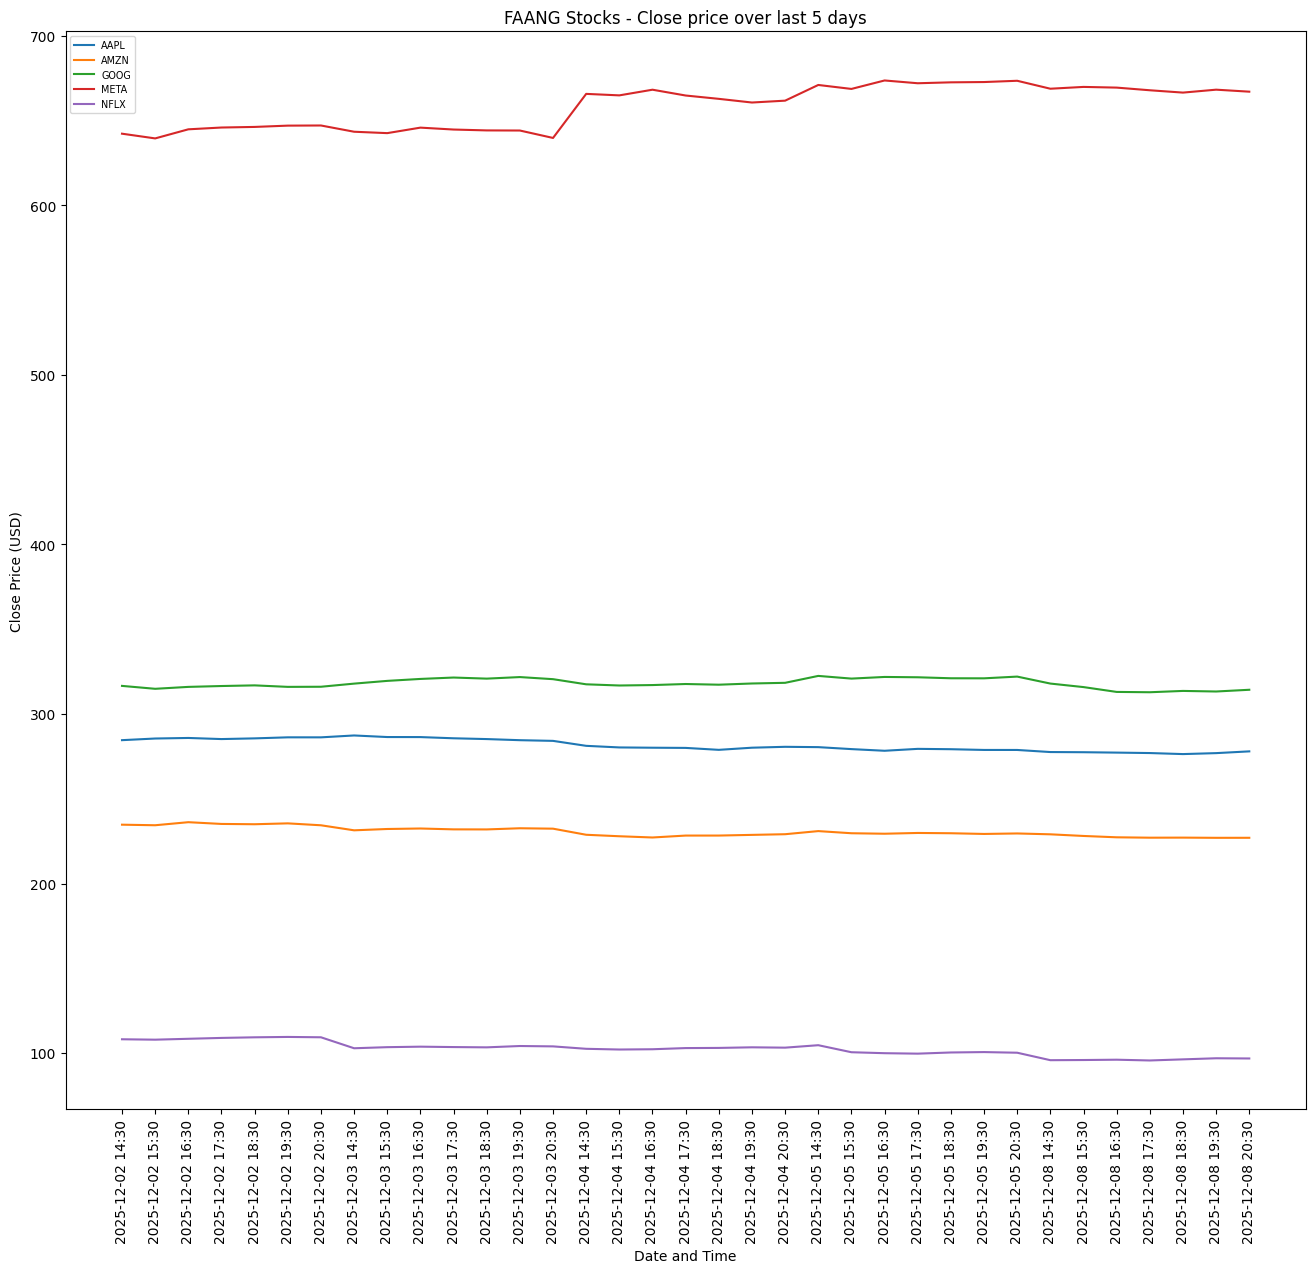

In [122]:
# get subset for closing prices 
close_price = df_latest_tickers['Close']
# get index (date and time)
date = df_latest_tickers['Date']

# execute the function 
plot_close_price(df_latest_tickers['Date'], df_latest_tickers['Close'])

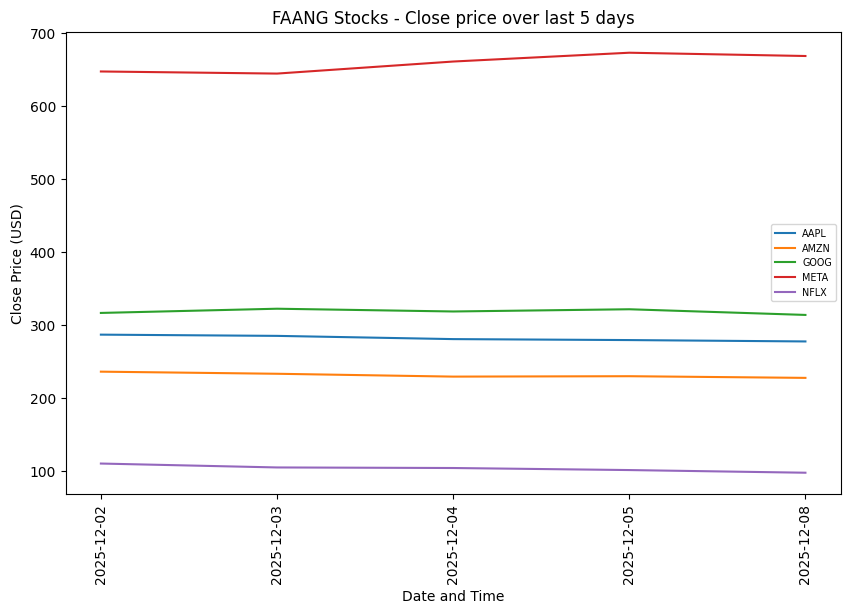

In [123]:
# [REMOVE]
# Plot EOD close price 

# get subset for closing prices 
close_price = eod_tickers['Close']
# get index (date and time)
eod_date = eod_tickers['Date']

fig, ax = plt.subplots(figsize = (10,6))
ax.plot(eod_date, close_price)
ax.set_xlabel('Date and Time')
ax.set_ylabel('Close Price (USD)')
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
ax.legend(labels = ["AAPL", "AMZN", "GOOG", "META", "NFLX"], fontsize = 'x-small')
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html 
ax.set_xticks(eod_date, labels = eod_date, rotation = 'vertical') 

ax.set_title('FAANG Stocks - Close price over last 5 days')

plt.show()








In [124]:
# Plot EOD close price in subplots 

# See: https://chatgpt.com/share/6910e526-a2d0-800f-be66-94ac6a06bf9c 
# To add: percentage variation in value at EOD close price

# Create arrays for variables
aapl = eod_tickers[('Close','AAPL')]
amzn = eod_tickers[('Close','AMZN')]
goog = eod_tickers[('Close','GOOG')]
meta = eod_tickers[('Close','META')]
nflx = eod_tickers[('Close','NFLX')]

data = [aapl, amzn, goog, meta, nflx]
titles = ['AAPL', 'AMZN', 'GOOG', 'META', 'NFLX']


In [ ]:

# Function to plot the data 

def plot_close_price_subplots(data, titles):
# Put data and titles in lists for easy looping

    # Create subplots: 2 rows, 3 columns, but we'll hide the last (empty) one
    fig, axs = plt.subplots(2, 3, figsize=(14, 8))

    # Flatten the 2D array of axes for easy iteration
    axs = axs.flatten()

    # Plot each stock
    for i, (ax, series, title) in enumerate(zip(axs, data, titles)):
        ax.plot(eod_date, series)
        ax.set_title(title)
        ax.tick_params(axis='x', rotation=90)

    # Hide the last unused subplot (the 6th one)
    axs[-1].set_visible(False)

    # Adjust spacing between plots
    fig.tight_layout(pad=3.0)

    # save image 
    image_name = latest_tickers_data.strip('.csv') + '_subplots.png'
    plt.savefig("images/"+ image_name)

    
    plt.show()

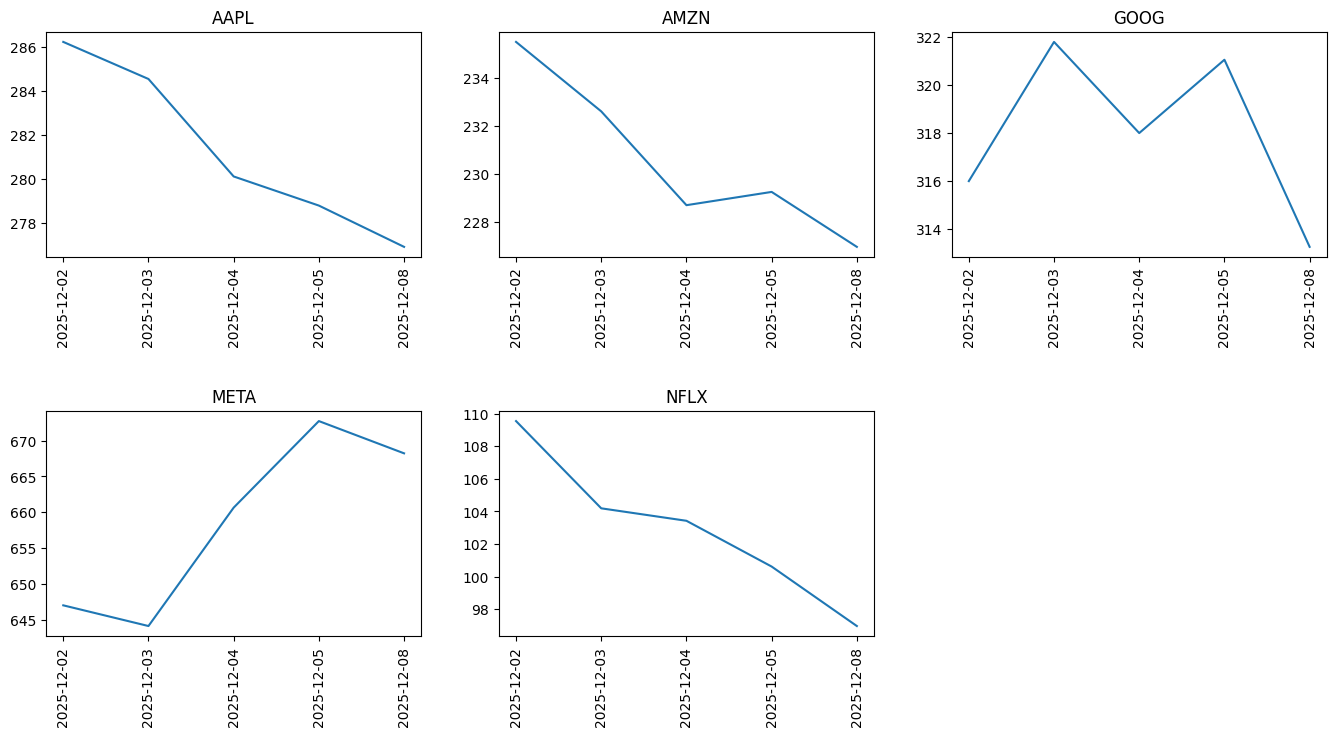

In [126]:
plot_close_price_subplots(data, titles)